# Importing Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

# Reading and Understanding Data and Performing EDA

In [65]:
bike= pd.read_csv("Bike Sharing Dataset.csv")

In [67]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [69]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [71]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### There are no null values in the dataset

In [74]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [76]:
bike.shape

(730, 16)

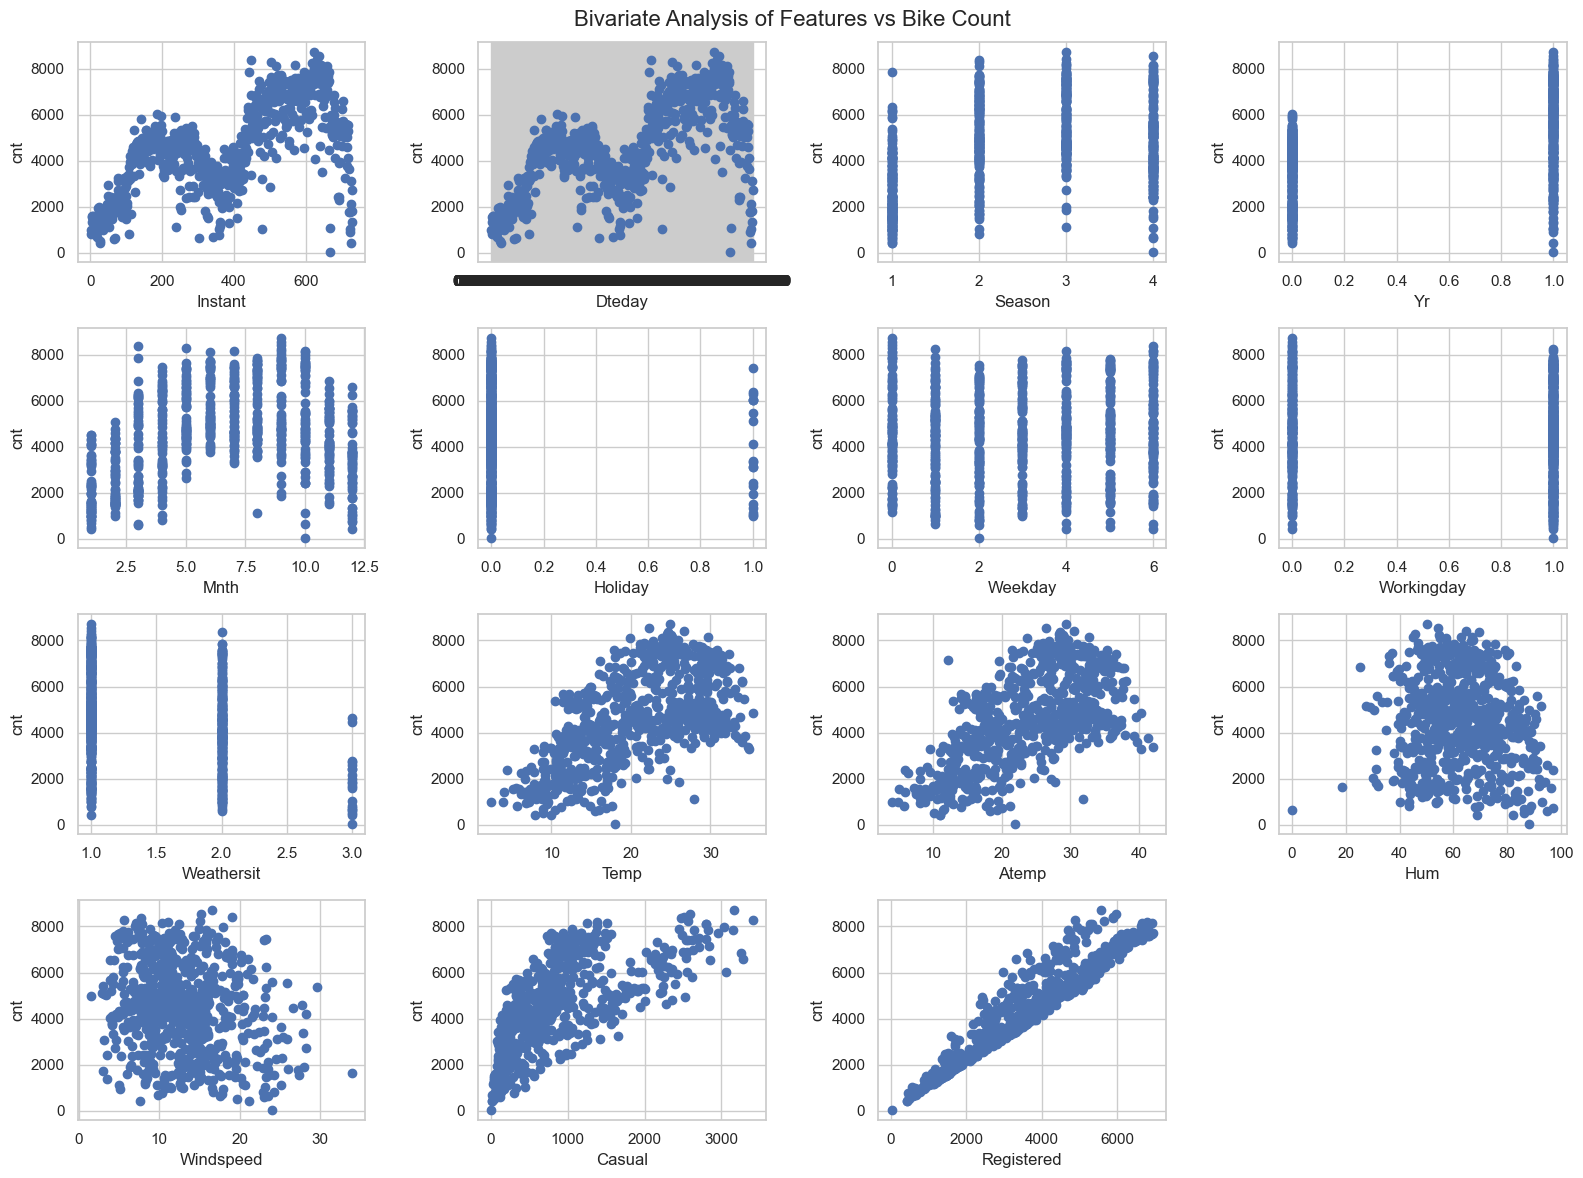

In [86]:
plt.figure(figsize=(16,12))
plot_count = 1
for i in list(bike.columns)[:-1]:
    plt.subplot(4, 4, plot_count)
    plt.scatter(bike[i], bike['cnt'])
    plt.xlabel(i.title())
    plt.ylabel('cnt')
    plot_count += 1
plt.suptitle('Bivariate Analysis of Features vs Bike Count', fontsize=16)
plt.tight_layout()
plt.show()

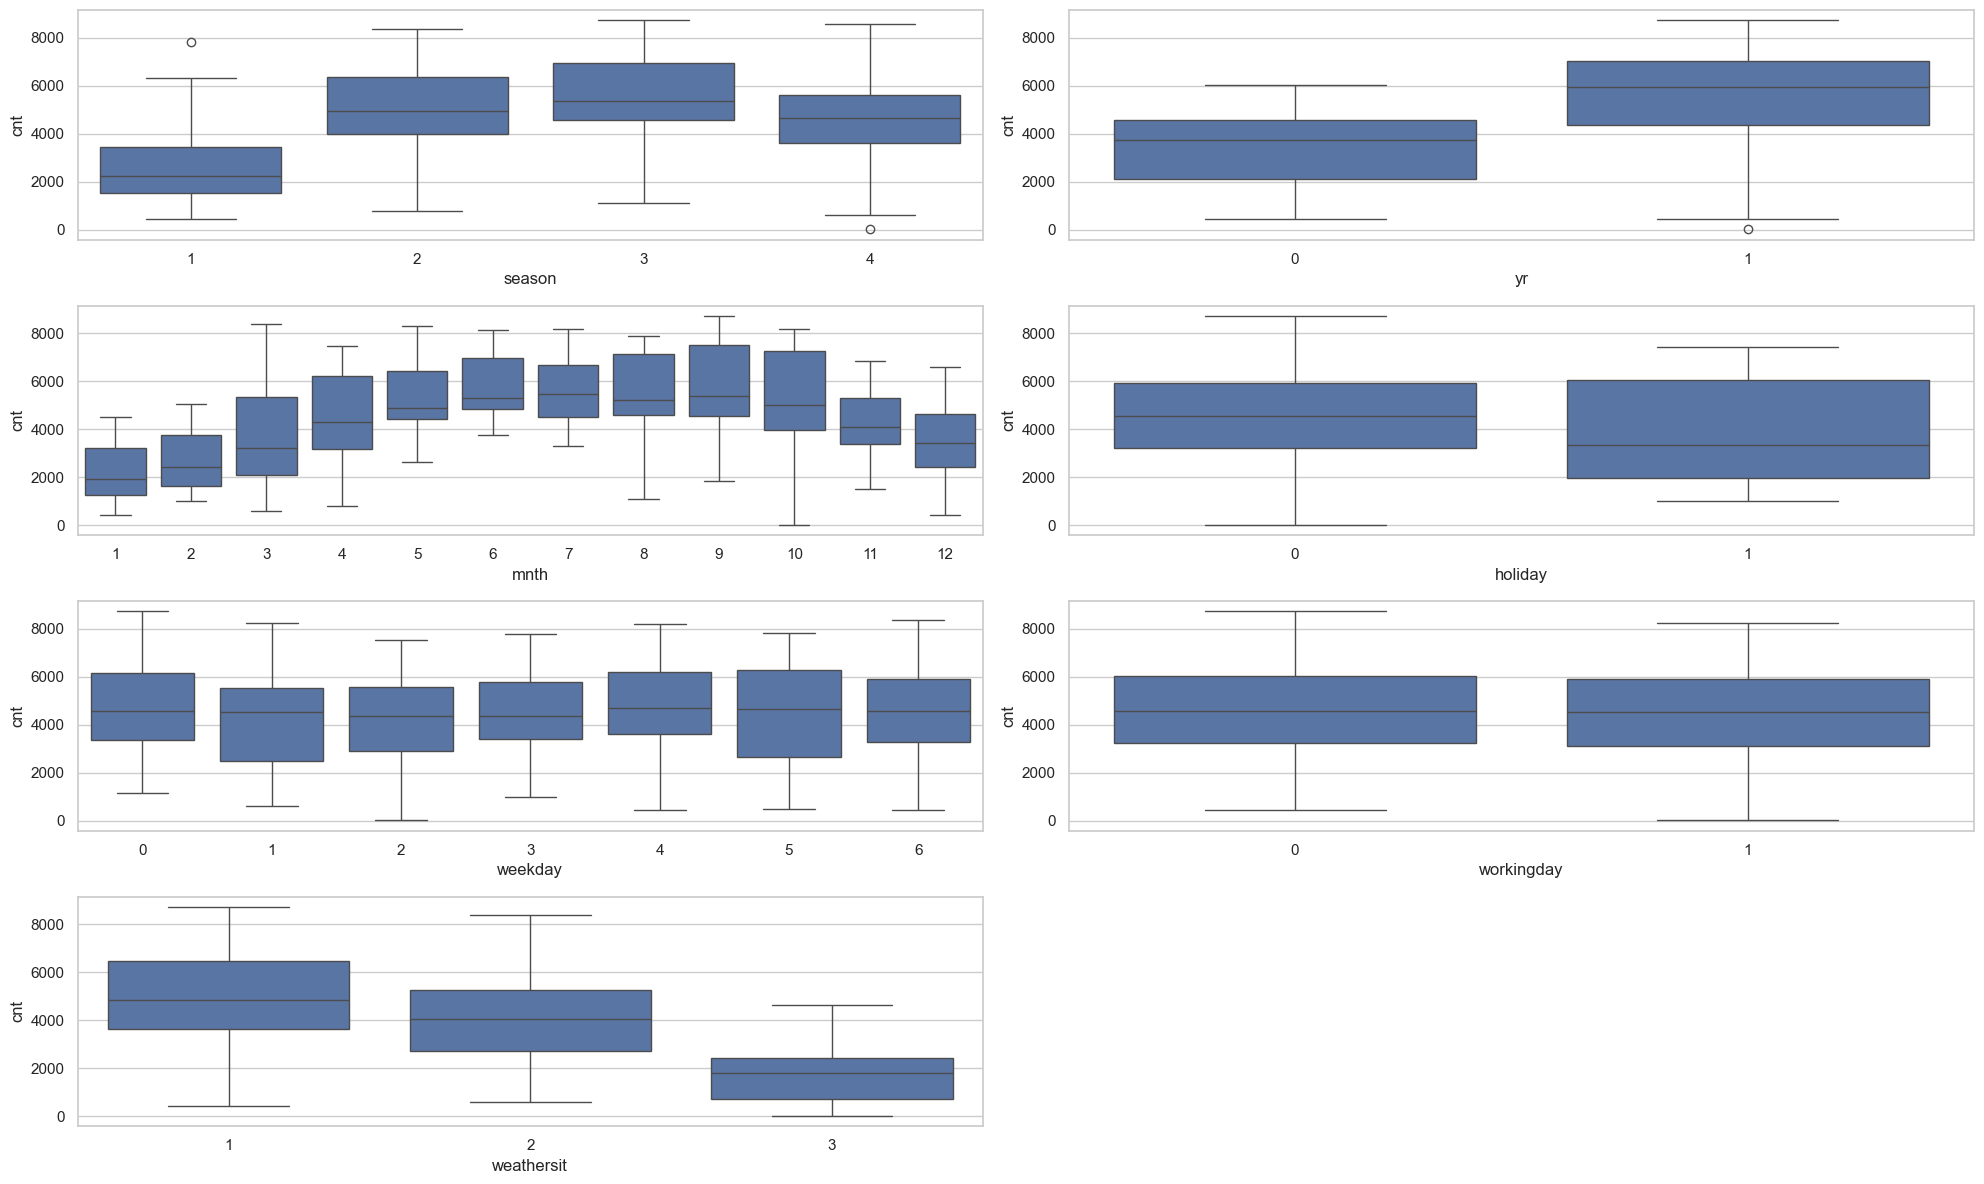

In [87]:
plt.figure(figsize=(20,12))
plt.subplot(4,2,1)
sns.boxplot(x='season', y='cnt', data=bike)

plt.subplot(4,2,2)
sns.boxplot(x='yr', y='cnt', data=bike)

plt.subplot(4,2,3)
sns.boxplot(x='mnth', y='cnt', data=bike)

plt.subplot(4,2,4)
sns.boxplot(x='holiday', y='cnt', data=bike)

plt.subplot(4,2,5)
sns.boxplot(x='weekday', y='cnt', data=bike)

plt.subplot(4,2,6)
sns.boxplot(x='workingday', y='cnt', data=bike)

plt.subplot(4,2,7)
sns.boxplot(x='weathersit', y='cnt', data=bike)

plt.tight_layout()
plt.show()

# Data Preparation and EDA
- droping the unneccery columns
- converting binary  variables to 1 or 0
- convert feature values into categorical string values
- categorical variables to dummy variables

In [91]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [93]:
bike= bike.drop(['casual','registered'], axis='columns')

I have dropped casual and registered because they are not featrues. 

In [96]:
bike= bike.drop(['instant','dteday'], axis='columns')

instant: This is just a index variable and it does not contribute to the prediction so I have decided to drop it.

dteday: In our case the date itself is not required, but we can extract useful information like month, day and year which is already present in mnth, weekday and yr columns. So, it is better to drop it.

In [99]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [101]:
numerical_cols = ['temp', 'hum', 'windspeed', 'cnt'] 

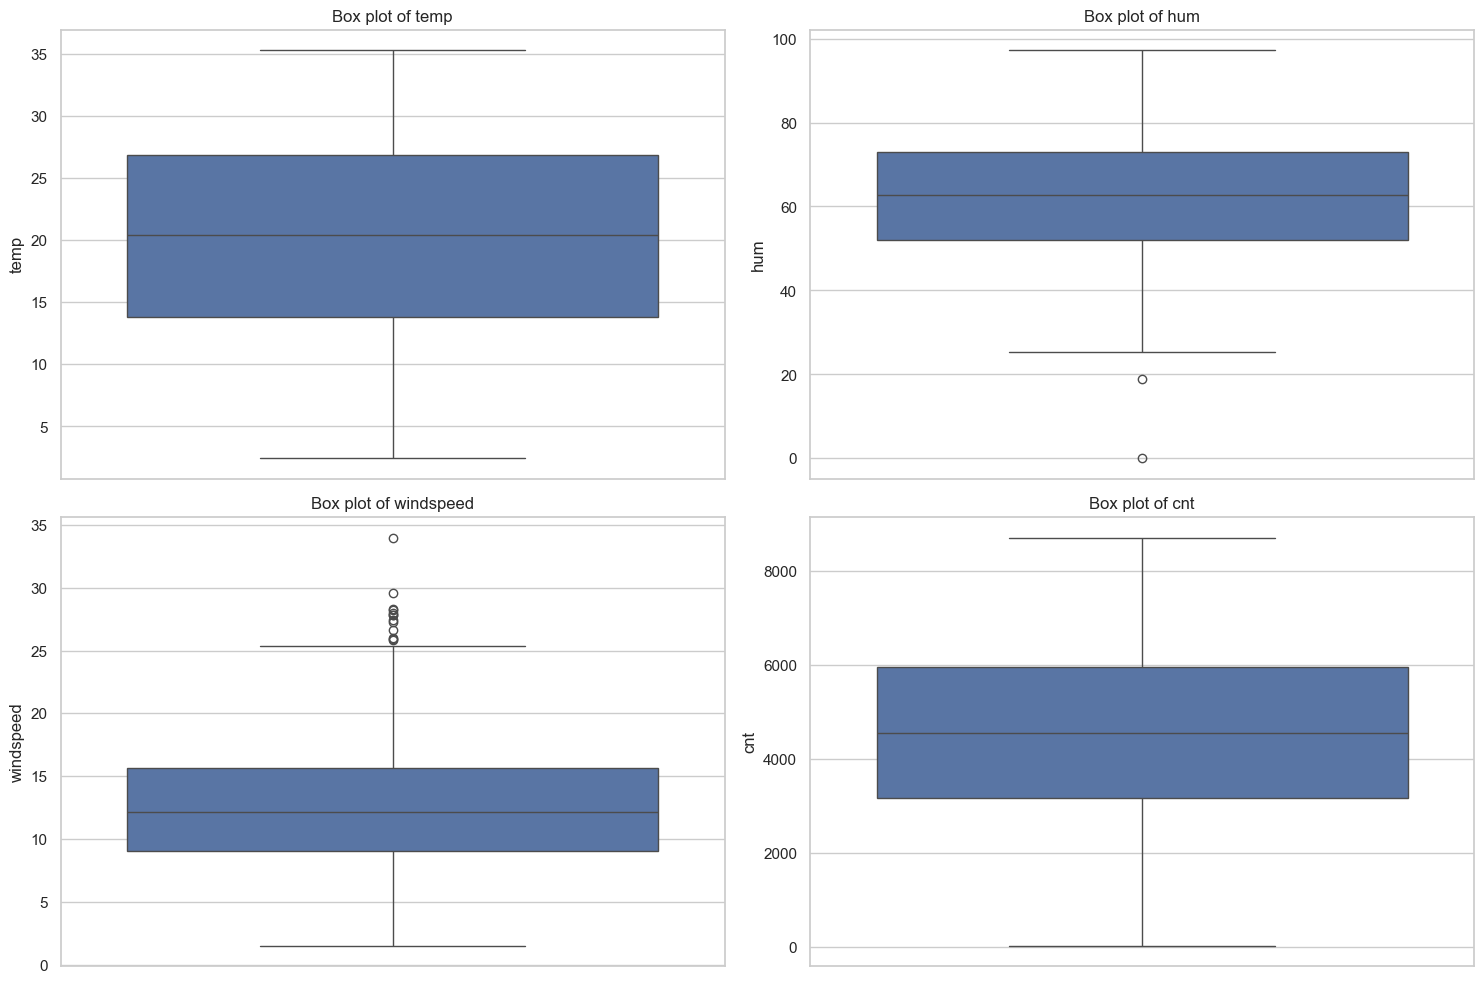

In [103]:
# checking for outliers
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(bike[col])
    plt.title(f'Box plot of {col}', fontsize=12)

plt.tight_layout()
plt.show()

Outliers are only present in the windspeed variable, while the other variables (temp, hum, and cnt) show no significant outliers. Since the outliers in windspeed are few and do not heavily distort the data, no outlier treatment is necessary.
Furthermore, the outliers in windspeed represent natural variability in wind conditions. Since these values could reflect actual weather phenomena, removing them would result in loss of important information.

In [106]:
weathersit_mapping = {
    1: "clear",
    2: "mist_cloudy",
    3: "light_snow_rain",
    4: "heavy_rain_snow"
}

bike['weathersit'] = bike['weathersit'].replace(weathersit_mapping)


In [108]:
season_mapping = {
    1: "spring",
    2: "summer",
    3: "fall",
    4: "winter"
}

bike['season'] = bike['season'].replace(season_mapping)

Here I have convert the numeric value to the associated string value. Because When I will crete the dummy varibles of this columns then it will make more sense than the numeric and will also be more easy to understand.

In case of weathersit in data dictionary there were long sting values. I have shotern the string values but it still makes the same sense.

I have not converted the mnth and weekday values to associated string values because I think that more or less things will be same as numeric values also give the clear understanding. Also, if I convert it, it will increase the number of column by 19 which will make understanding and model making difficult.

In [111]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [113]:
# creating dummy variables for season
# dropping redundant dummy variable
status= pd.get_dummies(bike['season'], drop_first=True).astype(int)
status.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [115]:
# concat dummy df with the original one
bike= pd.concat([bike, status], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,1,0,1,1,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,1,0,2,1,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [117]:
bike= bike.drop('season', axis=1)
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,1,1,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,2,1,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [119]:
bike['weathersit'].value_counts()

weathersit
clear              463
mist_cloudy        246
light_snow_rain     21
Name: count, dtype: int64

In [121]:
status= pd.get_dummies(bike['weathersit'], drop_first=True).astype(int)
status.head()

,light_snow_rain,mist_cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [123]:
bike= pd.concat([bike, status], axis=1)
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light_snow_rain,mist_cloudy
0,0,1,0,1,1,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,2,1,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [125]:
bike= bike.drop('weathersit', axis=1)
bike.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light_snow_rain,mist_cloudy
0,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [127]:
bike.shape

(730, 15)

Here I have created the dummy variables for season and weathersit.
I have not created the dummy variables for mnth and weekday columns because it will increse the number of columns. And their will be too many columns to look at. So, it is better to leave them as it is. 

# Splitting into train and test

In [131]:
df_train, df_test = train_test_split(bike, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 15)
(220, 15)


I have use 70% of dataset for training purpose and 30% for testing of the model.

# Rescaling the features

In [135]:
scaler= MinMaxScaler()

In [137]:
num_vars=['temp','atemp','hum','windspeed','cnt']

In [139]:
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light_snow_rain,mist_cloudy
576,1,7,0,3,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0
426,1,3,0,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1
728,1,12,0,1,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0
482,1,4,0,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1
111,0,4,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,1


I have rescale the features using minmax resacling method. 

In [142]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light_snow_rain,mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,6.541176,0.025490,2.950980,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.029412,0.345098
std,0.500429,3.465416,0.157763,1.977166,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.169124,0.475867
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,1.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,7.000000,0.000000,3.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


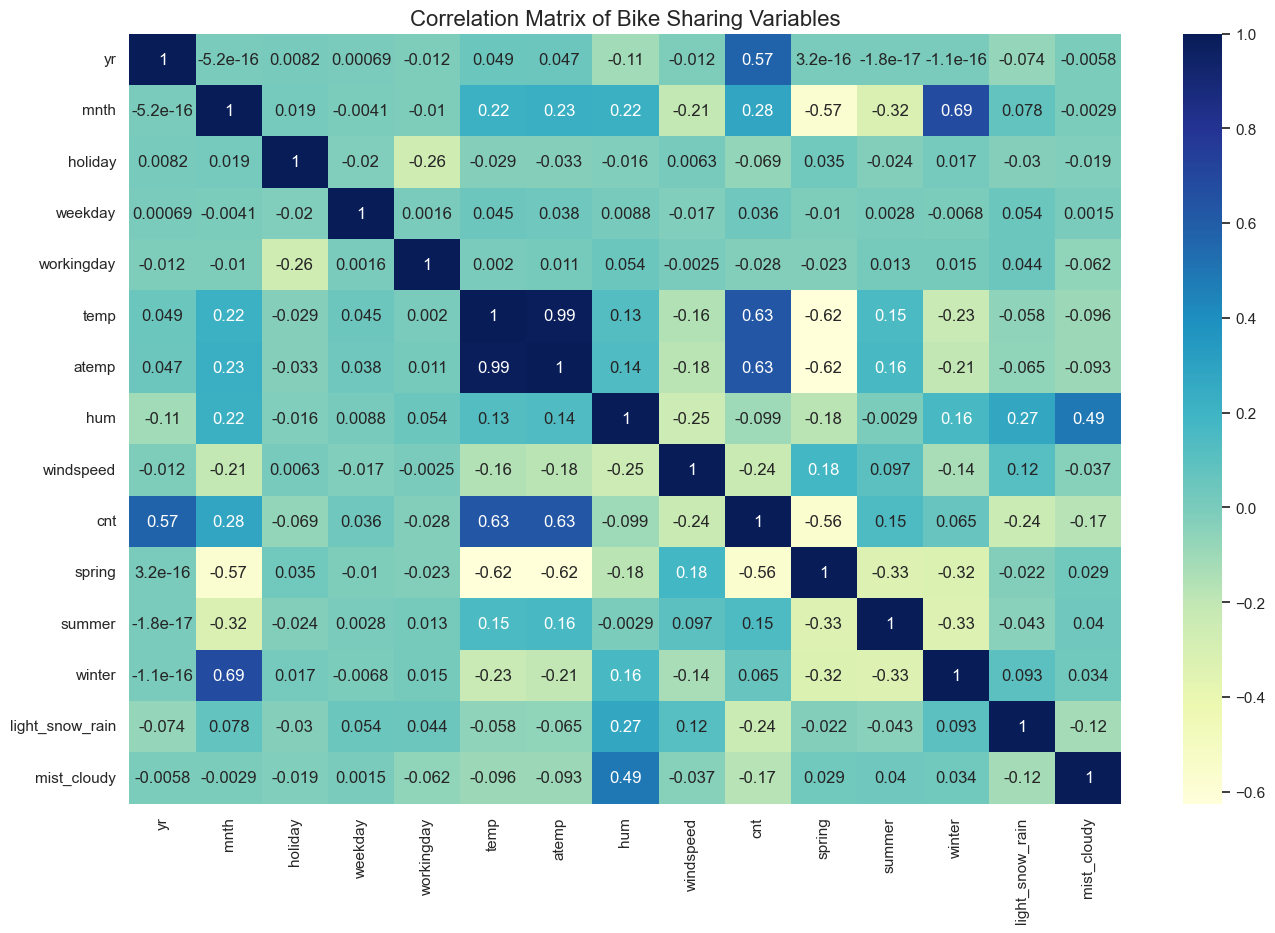

In [146]:
# mulit-varient analysis
plt.figure(figsize=(16,10))
sns.heatmap(bike.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix of Bike Sharing Variables", fontsize=16)
plt.show()

# Bulding Model

Before making this model I had tried to make model using RFE with 5 features and 10 features. I had also made model for this dataset using backward approach. From this modles I learned that temp, hum, windspeed are some important variables. I going to use forward stepwise approach for this model.

In [150]:
y_train = df_train.pop("cnt")
x_train = df_train

In [152]:
x_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,light_snow_rain,mist_cloudy
576,1,7,0,3,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0
426,1,3,0,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,1
728,1,12,0,1,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0
482,1,4,0,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,1
111,0,4,0,0,0,0.345824,0.318819,0.751824,0.380981,0,1,0,0,1


In [154]:
# adding variable temp
x_train_sm= x_train['temp']
x_train_sm= sm.add_constant(x_train_sm)

In [156]:
lr= sm.OLS(y_train,x_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           2.46e-61
Time:                        16:08:50   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
vif = pd. DataFrame()
x= x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values (by="VIF", ascending = False)
vif

,Features,VIF
0,const,6.67
1,temp,1.00


In [160]:
# adding variable hum
x_train_sm= x_train[['temp','hum']]
x_train_sm= sm.add_constant(x_train_sm)

In [162]:
lr= sm.OLS(y_train,x_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     200.8
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           5.99e-65
Time:                        16:08:58   Log-Likelihood:                 187.65
No. Observations:                 510   AIC:                            -369.3
Df Residuals:                     507   BIC:                            -356.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3185      0.036      8.769      0.000       0.247       0.390
temp           0.6661      0.033     19.960      0.000       0.601       0.732
hum           -0.2506      0.052     -4.850      0.000      -0.352      -0.149
==============================================================================
Omnibus:                        4.282   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                3.354
Skew:                           0.078   Prob(JB):                        0.187
Kurtosis:                       2.635   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
vif = pd. DataFrame()
x= x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values (by="VIF", ascending = False)
vif

,Features,VIF
0,const,23.85
1,temp,1.02
2,hum,1.02


In [166]:
# adding variable windspeed
x_train_sm= x_train[['temp','hum','windspeed']]
x_train_sm= sm.add_constant(x_train_sm)

In [168]:
lr= sm.OLS(y_train,x_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     152.1
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           2.87e-70
Time:                        16:09:01   Log-Likelihood:                 202.83
No. Observations:                 510   AIC:                            -397.7
Df Residuals:                     506   BIC:                            -380.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4596      0.043     10.580      0.000       0.374       0.545
temp           0.6381      0.033     19.447      0.000       0.574       0.703
hum           -0.3214      0.052     -6.205      0.000      -0.423      -0.220
windspeed     -0.2492      0.045     -5.571      0.000      -0.337      -0.161
==============================================================================
Omnibus:                        4.176   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                3.501
Skew:                           0.110   Prob(JB):                        0.174
Kurtosis:                       2.659   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
vif = pd. DataFrame()
x= x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values (by="VIF", ascending = False)
vif

,Features,VIF
0,const,36.13
3,windspeed,1.10
2,hum,1.09
1,temp,1.05


In [172]:
# adding variable yr
x_train_sm= x_train[['temp','hum','windspeed','yr']]
x_train_sm= sm.add_constant(x_train_sm)

In [174]:
lr= sm.OLS(y_train,x_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     349.1
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          7.75e-144
Time:                        16:09:03   Log-Likelihood:                 376.97
No. Observations:                 510   AIC:                            -743.9
Df Residuals:                     505   BIC:                            -722.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3209      0.032     10.179      0.000       0.259       0.383
temp           0.5749      0.024     24.447      0.000       0.529       0.621
hum           -0.2383      0.037     -6.435      0.000      -0.311      -0.166
windspeed     -0.2456      0.032     -7.717      0.000      -0.308      -0.183
yr             0.2313      0.010     22.242      0.000       0.211       0.252
==============================================================================
Omnibus:                       18.043   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.788
Skew:                          -0.386   Prob(JB):                     3.06e-05
Kurtosis:                       3.619   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
vif = pd. DataFrame()
x= x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values (by="VIF", ascending = False)
vif

,Features,VIF
0,const,37.60
2,hum,1.10
3,windspeed,1.10
1,temp,1.06
4,yr,1.02


In [178]:
# adding variable spring
x_train_sm= x_train[['temp','hum','windspeed','yr','spring']]
x_train_sm= sm.add_constant(x_train_sm)

In [180]:
lr= sm.OLS(y_train,x_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     368.3
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          1.06e-165
Time:                        16:09:04   Log-Likelihood:                 431.03
No. Observations:                 510   AIC:                            -850.1
Df Residuals:                     504   BIC:                            -824.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4680      0.031     14.894      0.000       0.406       0.530
temp           0.4084      0.026     15.648      0.000       0.357       0.460
hum           -0.2812      0.034     -8.376      0.000      -0.347      -0.215
windspeed     -0.2286      0.029     -7.967      0.000      -0.285      -0.172
yr             0.2337      0.009     24.955      0.000       0.215       0.252
spring        -0.1497      0.014    -10.910      0.000      -0.177      -0.123
==============================================================================
Omnibus:                       67.345   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.830
Skew:                          -0.716   Prob(JB):                     2.92e-33
Kurtosis:                       5.236   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
vif = pd. DataFrame()
x= x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values (by="VIF", ascending = False)
vif

,Features,VIF
0,const,46.08
1,temp,1.62
5,spring,1.62
2,hum,1.12
3,windspeed,1.11
4,yr,1.02


In [184]:
# adding variable summer
x_train_sm= x_train[['temp','hum','windspeed','yr','spring','summer']]
x_train_sm= sm.add_constant(x_train_sm)

In [186]:
lr= sm.OLS(y_train,x_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     306.4
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          2.13e-164
Time:                        16:09:06   Log-Likelihood:                 431.04
No. Observations:                 510   AIC:                            -848.1
Df Residuals:                     503   BIC:                            -818.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4675      0.032     14.710      0.000       0.405       0.530
temp           0.4086      0.026     15.595      0.000       0.357       0.460
hum           -0.2810      0.034     -8.355      0.000      -0.347      -0.215
windspeed     -0.2292      0.029     -7.877      0.000      -0.286      -0.172
yr             0.2337      0.009     24.928      0.000       0.215       0.252
spring        -0.1491      0.015    -10.234      0.000      -0.178      -0.120
summer         0.0015      0.012      0.126      0.900      -0.021       0.024
==============================================================================
Omnibus:                       67.100   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.001
Skew:                          -0.714   Prob(JB):                     4.41e-33
Kurtosis:                       5.230   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
vif = pd. DataFrame()
x= x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values (by="VIF", ascending = False)
vif

,Features,VIF
0,const,47.03
5,spring,1.82
1,temp,1.63
6,summer,1.17
3,windspeed,1.13
2,hum,1.12
4,yr,1.02


The p-value of summer is too high and it is also not contributing in prediction so I will not use it in model.

In [191]:
# adding variable light_snow_rain
x_train_sm= x_train[['temp','hum','windspeed','yr','spring','light_snow_rain']]
x_train_sm= sm.add_constant(x_train_sm)

In [193]:
lr= sm.OLS(y_train,x_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     345.3
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          9.05e-175
Time:                        16:09:08   Log-Likelihood:                 455.31
No. Observations:                 510   AIC:                            -896.6
Df Residuals:                     503   BIC:                            -867.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4316      0.030     14.184      0.000       0.372       0.491
temp                0.3951      0.025     15.815      0.000       0.346       0.444
hum                -0.2171      0.033     -6.518      0.000      -0.282      -0.152
windspeed          -0.1979      0.028     -7.136      0.000      -0.252      -0.143
yr                  0.2318      0.009     25.916      0.000       0.214       0.249
spring             -0.1553      0.013    -11.832      0.000      -0.181      -0.129
light_snow_rain    -0.1945      0.027     -7.087      0.000      -0.248      -0.141
==============================================================================
Omnibus:                       50.769   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.682
Skew:                          -0.581   Prob(JB):                     5.05e-23
Kurtosis:                       4.866   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [195]:
vif = pd. DataFrame()
x= x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values (by="VIF", ascending = False)
vif

,Features,VIF
0,const,47.43
1,temp,1.63
5,spring,1.62
2,hum,1.21
3,windspeed,1.13
6,light_snow_rain,1.10
4,yr,1.02


In [197]:
# adding variable mist_cloudy
x_train_sm= x_train[['temp','hum','windspeed','yr','spring','light_snow_rain','mist_cloudy']]
x_train_sm= sm.add_constant(x_train_sm)

In [199]:
lr= sm.OLS(y_train,x_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     314.8
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          4.47e-179
Time:                        16:09:09   Log-Likelihood:                 468.42
No. Observations:                 510   AIC:                            -920.8
Df Residuals:                     502   BIC:                            -887.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3819      0.031     12.234      0.000       0.321       0.443
temp                0.3730      0.025     15.075      0.000       0.324       0.422
hum                -0.1015      0.039     -2.569      0.010      -0.179      -0.024
windspeed          -0.1773      0.027     -6.484      0.000      -0.231      -0.124
yr                  0.2341      0.009     26.792      0.000       0.217       0.251
spring             -0.1558      0.013    -12.173      0.000      -0.181      -0.131
light_snow_rain    -0.2419      0.028     -8.544      0.000      -0.298      -0.186
mist_cloudy        -0.0576      0.011     -5.148      0.000      -0.080      -0.036
==============================================================================
Omnibus:                       58.343   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.664
Skew:                          -0.593   Prob(JB):                     6.37e-32
Kurtosis:                       5.313   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
vif = pd. DataFrame()
x= x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values (by="VIF", ascending = False)
vif

,Features,VIF
0,const,52.45
2,hum,1.78
1,temp,1.68
5,spring,1.62
7,mist_cloudy,1.52
6,light_snow_rain,1.23
3,windspeed,1.16
4,yr,1.03


In [203]:
# adding variable winter
x_train_sm= x_train[['temp','hum','windspeed','yr','spring','light_snow_rain','mist_cloudy','winter']]
x_train_sm= sm.add_constant(x_train_sm)

In [205]:
lr= sm.OLS(y_train,x_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     284.7
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          6.35e-181
Time:                        16:09:10   Log-Likelihood:                 475.74
No. Observations:                 510   AIC:                            -933.5
Df Residuals:                     501   BIC:                            -895.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3393      0.033     10.355      0.000       0.275       0.404
temp                0.4418      0.030     14.561      0.000       0.382       0.501
hum                -0.1299      0.040     -3.273      0.001      -0.208      -0.052
windspeed          -0.1710      0.027     -6.323      0.000      -0.224      -0.118
yr                  0.2324      0.009     26.918      0.000       0.215       0.249
spring             -0.1201      0.016     -7.643      0.000      -0.151      -0.089
light_snow_rain    -0.2421      0.028     -8.667      0.000      -0.297      -0.187
mist_cloudy        -0.0519      0.011     -4.662      0.000      -0.074      -0.030
winter              0.0500      0.013      3.818      0.000       0.024       0.076
==============================================================================
Omnibus:                       72.606   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.347
Skew:                          -0.700   Prob(JB):                     1.40e-43
Kurtosis:                       5.707   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
vif = pd. DataFrame()
x= x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values (by="VIF", ascending = False)
vif

,Features,VIF
0,const,59.35
1,temp,2.59
5,spring,2.51
2,hum,1.85
8,winter,1.76
7,mist_cloudy,1.55
6,light_snow_rain,1.23
3,windspeed,1.16
4,yr,1.03


In [209]:
# adding variable mnth
x_train_sm= x_train[['temp','hum','windspeed','yr','spring','light_snow_rain','mist_cloudy','winter','mnth']]
x_train_sm= sm.add_constant(x_train_sm)

In [211]:
lr= sm.OLS(y_train,x_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     253.0
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          7.56e-180
Time:                        16:09:12   Log-Likelihood:                 476.13
No. Observations:                 510   AIC:                            -932.3
Df Residuals:                     500   BIC:                            -889.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3451      0.033     10.318      0.000       0.279       0.411
temp                0.4501      0.032     14.151      0.000       0.388       0.513
hum                -0.1287      0.040     -3.240      0.001      -0.207      -0.051
windspeed          -0.1722      0.027     -6.359      0.000      -0.225      -0.119
yr                  0.2319      0.009     26.808      0.000       0.215       0.249
spring             -0.1228      0.016     -7.666      0.000      -0.154      -0.091
light_snow_rain    -0.2425      0.028     -8.678      0.000      -0.297      -0.188
mist_cloudy        -0.0522      0.011     -4.684      0.000      -0.074      -0.030
winter              0.0606      0.018      3.397      0.001       0.026       0.096
mnth               -0.0019      0.002     -0.873      0.383      -0.006       0.002
==============================================================================
Omnibus:                       72.631   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.162
Skew:                          -0.701   Prob(JB):                     1.54e-43
Kurtosis:                       5.704   Cond. No.                         89.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [213]:
vif = pd. DataFrame()
x= x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values (by="VIF", ascending = False)
vif

,Features,VIF
0,const,61.80
8,winter,3.27
9,mnth,3.07
1,temp,2.85
5,spring,2.61
2,hum,1.85
7,mist_cloudy,1.55
6,light_snow_rain,1.23
3,windspeed,1.17
4,yr,1.03


the p-value of mnth is very high (0.383) and it has not contributed to r2_sqared also. Furhter after adding mnth the vif is also significantly increased of all variables. So I will drop mnth from model.

In [216]:
# adding variable holiday
x_train_sm= x_train[['temp','hum','windspeed','yr','spring','light_snow_rain','mist_cloudy','winter','holiday']]
x_train_sm= sm.add_constant(x_train_sm)

In [218]:
lr= sm.OLS(y_train,x_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     259.1
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          5.75e-182
Time:                        16:09:13   Log-Likelihood:                 481.12
No. Observations:                 510   AIC:                            -942.2
Df Residuals:                     500   BIC:                            -899.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3402      0.032     10.482      0.000       0.276       0.404
temp                0.4412      0.030     14.680      0.000       0.382       0.500
hum                -0.1285      0.039     -3.270      0.001      -0.206      -0.051
windspeed          -0.1697      0.027     -6.334      0.000      -0.222      -0.117
yr                  0.2321      0.009     27.138      0.000       0.215       0.249
spring             -0.1179      0.016     -7.562      0.000      -0.148      -0.087
light_snow_rain    -0.2460      0.028     -8.881      0.000      -0.300      -0.192
mist_cloudy        -0.0535      0.011     -4.847      0.000      -0.075      -0.032
winter              0.0525      0.013      4.040      0.000       0.027       0.078
holiday            -0.0878      0.027     -3.265      0.001      -0.141      -0.035
==============================================================================
Omnibus:                       64.024   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.786
Skew:                          -0.643   Prob(JB):                     1.22e-35
Kurtosis:                       5.431   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [220]:
vif = pd. DataFrame()
x= x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values (by="VIF", ascending = False)
vif

,Features,VIF
0,const,59.35
1,temp,2.59
5,spring,2.52
2,hum,1.85
8,winter,1.77
7,mist_cloudy,1.55
6,light_snow_rain,1.23
3,windspeed,1.16
4,yr,1.03
9,holiday,1.01


In [222]:
# adding variable atemp
x_train_sm= x_train[['temp','hum','windspeed','yr','spring','light_snow_rain','mist_cloudy','winter','holiday','atemp']]
x_train_sm= sm.add_constant(x_train_sm)

In [224]:
lr= sm.OLS(y_train,x_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.1
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          6.85e-181
Time:                        16:09:15   Log-Likelihood:                 481.46
No. Observations:                 510   AIC:                            -940.9
Df Residuals:                     499   BIC:                            -894.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3385      0.033     10.405      0.000       0.275       0.402
temp                0.3340      0.135      2.473      0.014       0.069       0.599
hum                -0.1306      0.039     -3.316      0.001      -0.208      -0.053
windspeed          -0.1661      0.027     -6.117      0.000      -0.219      -0.113
yr                  0.2321      0.009     27.133      0.000       0.215       0.249
spring             -0.1177      0.016     -7.546      0.000      -0.148      -0.087
light_snow_rain    -0.2441      0.028     -8.783      0.000      -0.299      -0.190
mist_cloudy        -0.0532      0.011     -4.813      0.000      -0.075      -0.032
winter              0.0517      0.013      3.962      0.000       0.026       0.077
holiday            -0.0869      0.027     -3.228      0.001      -0.140      -0.034
atemp               0.1159      0.142      0.813      0.416      -0.164       0.396
==============================================================================
Omnibus:                       66.319   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.302
Skew:                          -0.666   Prob(JB):                     7.73e-37
Kurtosis:                       5.460   Cond. No.                         75.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [226]:
vif = pd. DataFrame()
x= x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values (by="VIF", ascending = False)
vif

,Features,VIF
0,const,59.60
1,temp,52.32
10,atemp,51.46
5,spring,2.52
2,hum,1.86
8,winter,1.78
7,mist_cloudy,1.56
6,light_snow_rain,1.24
3,windspeed,1.19
4,yr,1.03


The p-value and vif of atemp is way too high so I will not include it in the model.

In [229]:
# adding variable workingday
x_train_sm= x_train[['temp','hum','windspeed','yr','spring','light_snow_rain','mist_cloudy','winter','holiday','workingday']]
x_train_sm= sm.add_constant(x_train_sm)

In [231]:
lr= sm.OLS(y_train,x_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.9
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          1.41e-181
Time:                        16:09:16   Log-Likelihood:                 483.08
No. Observations:                 510   AIC:                            -944.2
Df Residuals:                     499   BIC:                            -897.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3526      0.033     10.693      0.000       0.288       0.417
temp                0.4382      0.030     14.606      0.000       0.379       0.497
hum                -0.1228      0.039     -3.124      0.002      -0.200      -0.046
windspeed          -0.1685      0.027     -6.306      0.000      -0.221      -0.116
yr                  0.2321      0.009     27.222      0.000       0.215       0.249
spring             -0.1188      0.016     -7.642      0.000      -0.149      -0.088
light_snow_rain    -0.2484      0.028     -8.985      0.000      -0.303      -0.194
mist_cloudy        -0.0560      0.011     -5.050      0.000      -0.078      -0.034
winter              0.0526      0.013      4.062      0.000       0.027       0.078
holiday            -0.1020      0.028     -3.674      0.000      -0.157      -0.047
workingday         -0.0190      0.010     -1.963      0.050      -0.038    1.94e-05
==============================================================================
Omnibus:                       69.235   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.642
Skew:                          -0.710   Prob(JB):                     1.07e-36
Kurtosis:                       5.404   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [233]:
vif = pd. DataFrame()
x= x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values (by="VIF", ascending = False)
vif

,Features,VIF
0,const,61.62
1,temp,2.60
5,spring,2.52
2,hum,1.86
8,winter,1.77
7,mist_cloudy,1.57
6,light_snow_rain,1.24
3,windspeed,1.16
9,holiday,1.09
10,workingday,1.09


p-value of workingday is 0.05 which is quite a high value so I will not use this variable in my model.

In [236]:
x_train_sm= x_train[['temp','hum','windspeed','yr','spring','light_snow_rain','mist_cloudy','winter','holiday']]
x_train_sm= sm.add_constant(x_train_sm)

In [238]:
lr= sm.OLS(y_train,x_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     259.1
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          5.75e-182
Time:                        16:09:18   Log-Likelihood:                 481.12
No. Observations:                 510   AIC:                            -942.2
Df Residuals:                     500   BIC:                            -899.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3402      0.032     10.482      0.000       0.276       0.404
temp                0.4412      0.030     14.680      0.000       0.382       0.500
hum                -0.1285      0.039     -3.270      0.001      -0.206      -0.051
windspeed          -0.1697      0.027     -6.334      0.000      -0.222      -0.117
yr                  0.2321      0.009     27.138      0.000       0.215       0.249
spring             -0.1179      0.016     -7.562      0.000      -0.148      -0.087
light_snow_rain    -0.2460      0.028     -8.881      0.000      -0.300      -0.192
mist_cloudy        -0.0535      0.011     -4.847      0.000      -0.075      -0.032
winter              0.0525      0.013      4.040      0.000       0.027       0.078
holiday            -0.0878      0.027     -3.265      0.001      -0.141      -0.035
==============================================================================
Omnibus:                       64.024   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.786
Skew:                          -0.643   Prob(JB):                     1.22e-35
Kurtosis:                       5.431   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [240]:
vif = pd. DataFrame()
x= x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values (by="VIF", ascending = False)
vif

,Features,VIF
0,const,59.35
1,temp,2.59
5,spring,2.52
2,hum,1.85
8,winter,1.77
7,mist_cloudy,1.55
6,light_snow_rain,1.23
3,windspeed,1.16
4,yr,1.03
9,holiday,1.01


It looks like a good model with significant variables like temp, hum, windspeed, yr, spring, winter, mist_cloudy, light_snow_rain and holiday. Current model explains bike demand well based on the high R-squared. Adding more variables might not provide significant improvments. 

# Residual Analysis

In [244]:
y_train_pred = lr_model.predict(x_train_sm)
residuals = y_train - y_train_pred

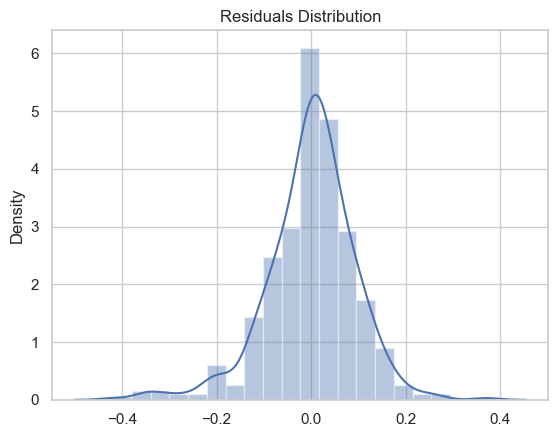

In [246]:
sns.distplot(residuals, bins=20)
plt.title('Residuals Distribution')
plt.show()


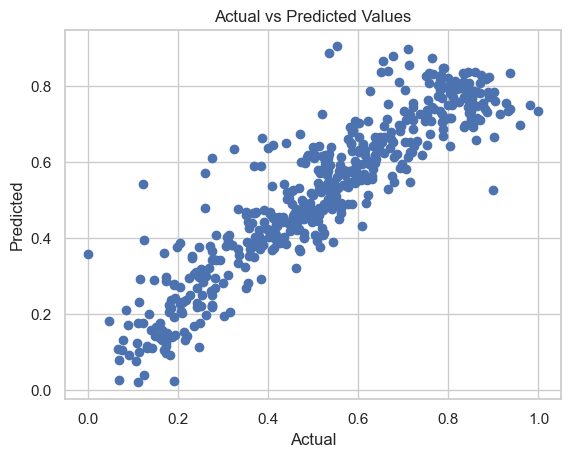

In [248]:
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

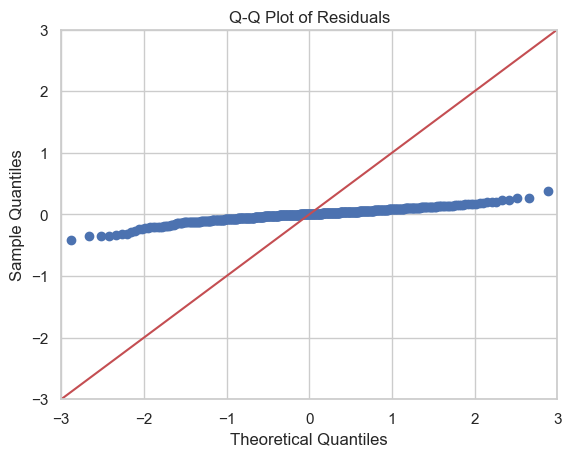

In [250]:
import scipy.stats as stats
fig = sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

The residual analysis and diagnostic plots look well-structured.
- While there was some variation, the histogram displayed a generally bell-shaped distribution, suggesting that the residuals are approximately           normally distributed with no significant outliers.
- The Actual vs Predicted Plot shows a good fit between actual and predicted values, indicating the model is performing well.

# Predictions and Evaluation on the test set

In [254]:
# first we need to do rescaling on the test set variables
num_vars=['temp','atemp','hum','windspeed','cnt']
df_test[num_vars]= scaler.transform(df_test[num_vars])
df_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light_snow_rain,mist_cloudy
184,0,7,1,3,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1
535,1,6,0,4,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0
299,0,10,0,6,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,1
221,0,8,0,5,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,0
152,0,6,0,6,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0


In [256]:
df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light_snow_rain,mist_cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,6.490909,0.036364,3.100000,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.027273,0.318182
std,0.500809,3.422316,0.187620,2.053841,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.163248,0.466833
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,0.000000,3.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,9.000000,0.000000,5.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


In [258]:
y_test = df_test.pop('cnt')
x_test= df_test

In [260]:
x_train_sm.columns

Index(['const', 'temp', 'hum', 'windspeed', 'yr', 'spring', 'light_snow_rain',
       'mist_cloudy', 'winter', 'holiday'],
      dtype='object')

In [262]:
x_test_new = x_test[x_train_sm.drop('const',axis=1).columns]
x_test_new= sm.add_constant(x_test_new)

In [264]:
x_test_new.columns

Index(['const', 'temp', 'hum', 'windspeed', 'yr', 'spring', 'light_snow_rain',
       'mist_cloudy', 'winter', 'holiday'],
      dtype='object')

In [266]:
y_pred= lr_model.predict(x_test_new)

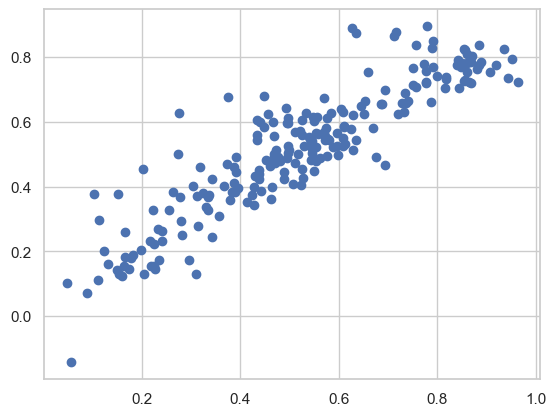

In [268]:
fig= plt.figure()
plt.scatter(y_test,y_pred)
plt.show()

In [270]:
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"R-squared on test set: {r2}")

R-squared on test set: 0.8078739735520786


The new R-squared value of 0.807 on the test set is excellent, indicating that our model explains 80.7% of the varience in the bike deman for the unseen data. This suggest that our model generalizes well to new data and is performing effectively.

Q1. Which variables are significant in predicting the demand for shared bikes?

According to my model, the significant variables in predicting the demand for shared bikes are:

- temp
- hum
- windspeed
- yr
- spring
- light_snow_rain
- mist_cloudy
- holiday

Q2. How well those variables describe the bike demands?
- temp: It has a coefficient of 0.4412 and a t-value of 14.680, indicating that this variable is highly significant. The higher the temperature, the more bikes are likely to be rented, reflecting a strong preference for biking in warmer weather.
- hum: With a negative coefficient of -0.1285 and a t-value of -3.270, humidity has a significant negative effect on bike demand, indicating that higher humidity levels lead to fewer rentals.
- windspeed: This variable also negatively impacts demand with a coefficient of -0.1697 and a t-value of -6.334. Higher wind speeds tend to deter bike rentals.
- yr: The coefficient of 0.2321 with a t-value of 27.138 suggests that demand increased in 2019 compared to 2018, indicating a growing popularity of bike-sharing services.
- spring: With a coefficient of -0.1179 and a t-value of -7.562, this variable indicates that bike demand decreases in the spring relative to the reference category, which highlights the importance of seasonal variations.
- light_snow_rain: This variable has a coefficient of -0.2460 and a t-value of -8.881, suggesting that the presence of light snow or rain significantly deters bike rentals.
- mist_cloudy: This variable has a coefficient of -0.0535 and a t-value of -4.847, indicating that misty or cloudy conditions negatively affect bike demand.
- holiday: The coefficient of -0.0878 with a t-value of -3.265 suggests that bike demand tends to decrease on holidays, likely due to changes in user behavior.

All these variables, supported by their statistical significance (p-values < 0.05), are well-suited for describing the demand for shared bikes. The model has a high R-squared value of 0.823, indicating that it explains 82.3% of the variation in bike demand.